# Churn Prediction for StreamWorks Media

## 1. Load and understand the data

In [68]:
# Load the dataset into a Pandas DataFrame
import pandas as pd

df = pd.read_csv('streamworks_user_data.csv')

*View the dataset*

In [69]:
# View the head of the dataset
df.head()

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,02-04-25,13-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,02-01-23,13-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,21-08-22,13-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,14-09-23,13-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,29-07-23,13-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99


*Understand the data*

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB


In [71]:
# Statistics for the numeric columns
df.describe()

,user_id,age,average_watch_hours,mobile_app_usage_pct,complaints_raised,is_churned,monthly_fee
count,1498.000000,1497.000000,1496.000000,1498.000000,1497.000000,1499.000000,1355.000000
mean,1750.871829,43.738811,39.903342,51.414419,2.498330,0.234156,10.180406
std,433.060980,15.083920,22.978288,28.580117,1.706829,0.423612,3.310705
min,1001.000000,18.000000,0.500000,0.000000,0.000000,0.000000,5.990000
25%,1376.250000,31.000000,19.450000,27.100000,1.000000,0.000000,5.990000
50%,1750.500000,44.000000,40.300000,52.700000,2.000000,0.000000,9.990000
75%,2125.750000,56.000000,59.800000,76.200000,4.000000,0.000000,13.990000
max,2500.000000,69.000000,79.900000,100.000000,5.000000,1.000000,14.990000


In [72]:
# Value counts for each column
value_counts = {col: df[col].value_counts() for col in df.columns}
print(value_counts)

{'user_id': user_id
2500.0    1
1001.0    1
1002.0    1
1003.0    1
1004.0    1
         ..
1015.0    1
1014.0    1
1013.0    1
1012.0    1
1011.0    1
Name: count, Length: 1498, dtype: int64, 'age': age
50.0    42
43.0    42
68.0    40
64.0    38
54.0    37
66.0    37
45.0    36
52.0    35
40.0    35
18.0    34
49.0    33
22.0    33
25.0    33
19.0    33
46.0    32
41.0    31
42.0    31
62.0    31
57.0    31
56.0    30
69.0    30
53.0    30
20.0    29
39.0    29
31.0    29
34.0    29
47.0    29
61.0    28
23.0    28
28.0    28
26.0    27
29.0    27
36.0    26
27.0    26
21.0    26
38.0    25
65.0    25
37.0    24
55.0    24
51.0    24
35.0    23
32.0    23
67.0    23
30.0    22
58.0    22
24.0    22
33.0    22
44.0    22
48.0    21
59.0    21
63.0    20
60.0    19
Name: count, dtype: int64, 'gender': gender
Female    510
Other     506
Male      483
Name: count, dtype: int64, 'signup_date': signup_date
19-09-23    6
26-01-23    6
28-10-24    6
29-08-23    6
30-05-24    6
           ..


In [73]:
# Missing values
df.isnull().sum()

,0
user_id,2
age,3
gender,1
signup_date,2
last_active_date,2
country,3
subscription_type,3
average_watch_hours,4
mobile_app_usage_pct,2
complaints_raised,3


*Correlation matrix and heatmap*

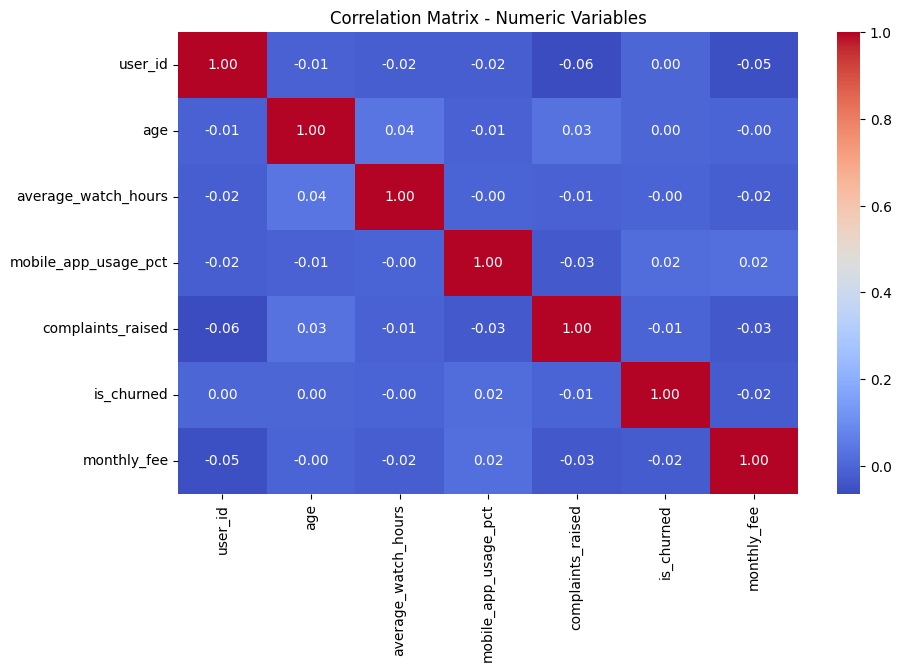

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Numeric Variables")
plt.show()

## 2. Clean the Data

*Convert date columns type to datetime*

In [75]:
# Convert the singup_date and last_active_date columns type from object to datetime
df['signup_date'] = pd.to_datetime(
    df['signup_date'],
    format="%d-%m-%y",
    errors='coerce'
)

df['last_active_date'] = pd.to_datetime(
    df['last_active_date'],
    format="%d-%m-%y",
    errors='coerce'
)

*Handle missing values*

* Drop the rows with missing values for identifiers and columns that are crucial for analysis

In [76]:
df.dropna(subset=["user_id", "signup_date", "last_active_date", "is_churned"], inplace=True)

* Impute with mode values for missing values in categorical columns

In [77]:
cols_to_mode = ["gender", "country", "subscription_type", "received_promotions", "referred_by_friend", "monthly_fee"]

for col in cols_to_mode:
    mode_vals = df[col].mode()
    if not mode_vals.empty: # only fill if mode exists
        mode_val = mode_vals[0]
        df.fillna({col: mode_val}, inplace=True)

* Impute with median values for numeric columns

In [78]:
cols_to_median = ['age', 'average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised']

for col in cols_to_median:
    df[col] = df[col].fillna(df[col].median())

*Re-check for any more missing values*

In [79]:
print("Number of missing values in the dataset: ", df.isnull().sum())

Number of missing values in the dataset:  user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
dtype: int64


## 3. Feature Engineering

*Create new features*

In [80]:
# tenure days
df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days

# is loyal
df['is_loyal'] = (df['tenure_days'] > 180).astype(int)

# watch per fee ration
df['watch_per_fee_ratio'] = df['average_watch_hours'] / df['monthly_fee']

# heavy mobile user
df['heavy_mobile_user'] = (df['mobile_app_usage_pct'] > 70).astype(int)


# Preview new columns
df[['average_watch_hours', 'monthly_fee', 'watch_per_fee_ratio',
    'mobile_app_usage_pct', 'heavy_mobile_user']].head()

,average_watch_hours,monthly_fee,watch_per_fee_ratio,mobile_app_usage_pct,heavy_mobile_user
0,42.6,10.99,3.876251,77.4,1
1,65.3,5.99,10.901503,98.0,1
2,40.1,13.99,2.866333,47.8,0
3,5.8,13.99,0.414582,53.2,0
4,32.7,9.99,3.273273,16.8,0


*Check for skewness and distribution shape*

In [81]:
# Select numeric columns (excluding IDs and binary flags)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
exclude_cols = ['user_id', 'is_loyal', 'is_churned', 'heavy_mobile_user']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Calculate skewness
skewness = df[numeric_cols].skew().sort_values(ascending=False)
print(skewness)

watch_per_fee_ratio     0.823801
monthly_fee             0.195611
complaints_raised       0.012828
tenure_days             0.001544
average_watch_hours    -0.012439
age                    -0.041297
mobile_app_usage_pct   -0.089344
dtype: float64


*Log transform*

In [82]:
# Apply log transform to watch_per_fee_ratio
import numpy as np

df['watch_per_fee_ratio'] = np.log1p(df['watch_per_fee_ratio'])

after_skew = df['watch_per_fee_ratio'].skew()

after_skew, df[['watch_per_fee_ratio']].head()

(np.float64(-0.3298039333062553),
    watch_per_fee_ratio
 0             1.584377
 1             2.476665
 2             1.352307
 3             0.346834
 4             1.452380)

*Normalisation*

In [83]:
from sklearn.preprocessing import StandardScaler

# Select numeric features (excluding IDs and target variables)
features_to_scale = [col for col in numeric_cols if col not in ['is_churned']]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform directly on df
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Preview scaled features
df[features_to_scale].head()

,age,average_watch_hours,mobile_app_usage_pct,complaints_raised,monthly_fee,tenure_days,watch_per_fee_ratio
0,0.810646,0.114994,0.910009,-0.878715,0.356259,-1.383032,0.064576
1,1.673246,1.104550,1.631183,0.883042,-1.122049,1.206789,1.460894
2,0.147107,0.006012,-0.126241,-1.465967,1.243245,1.629488,-0.298584
3,-0.781847,-1.489221,0.062804,-0.878715,1.243245,0.402399,-1.872021
4,1.076061,-0.316575,-1.211503,1.470294,0.060598,0.550659,-0.141982


*Encoding*

* Binary encode: *received_promotions*, *referred_by_friend*

In [84]:
from sklearn.preprocessing import OrdinalEncoder

binary_map = {'Yes': 1, 'No': 0, 1: 1, 0: 0}
df['received_promotions'] = df['received_promotions'].map(binary_map)
df['referred_by_friend'] = df['referred_by_friend'].map(binary_map)

Yes = 1, No = 0

* Ordinal encode: *subscription_type*, *gender*

In [85]:
ordinal_features = ['subscription_type', 'gender']
ordinal_encoder = OrdinalEncoder()
df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])

Basic = 0, Premium = 1, Standard = 2

Female = 0, Male = 1, Other = 2

* One-hot encode: *country*

In [86]:
df = pd.get_dummies(df, columns=['country'], drop_first=True)

In [87]:
# Preview
print(df.head())

   user_id       age  gender signup_date last_active_date  subscription_type  \
0   1001.0  0.810646     2.0  2025-04-02       2025-07-13                2.0   
1   1002.0  1.673246     1.0  2023-01-02       2025-07-13                0.0   
2   1003.0  0.147107     1.0  2022-08-21       2025-07-13                1.0   
3   1004.0 -0.781847     2.0  2023-09-14       2025-07-13                1.0   
4   1005.0  1.076061     0.0  2023-07-29       2025-07-13                2.0   

   average_watch_hours  mobile_app_usage_pct  complaints_raised  \
0             0.114994              0.910009          -0.878715   
1             1.104550              1.631183           0.883042   
2             0.006012             -0.126241          -1.465967   
3            -1.489221              0.062804          -0.878715   
4            -0.316575             -1.211503           1.470294   

   received_promotions  ...  monthly_fee  tenure_days  is_loyal  \
0                    0  ...     0.356259    -1.38

*Discretisation/Binning*

In [88]:
# Age bins
age_bins = [0, 17, 25, 35, 50, 100]
age_labels = ["<18", "18-25", "26-35", "36-50", "50+"]
df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=True)

# Watch time bins (hours watched per week)
watch_labels = ["Very Low", "Low", "Moderate", "High", "Very High"]
df["watch_time_group"] = pd.qcut(
    df["average_watch_hours"],
    q=5,
    labels=watch_labels,
    duplicates="drop"
)

# Preview
print(df[["average_watch_hours", "watch_time_group"]].head())
print("\nCounts per bin:")
print(df["watch_time_group"].value_counts(dropna=False))

   average_watch_hours watch_time_group
0             0.114994         Moderate
1             1.104550        Very High
2             0.006012         Moderate
3            -1.489221         Very Low
4            -0.316575         Moderate

Counts per bin:
watch_time_group
Moderate     300
Very Low     299
High         299
Low          298
Very High    297
Name: count, dtype: int64


*Interaction features*

In [89]:
# Interaction features

# 1. Received promotions AND low watch time
low_watch_categories = ["Very Low", "Low"]
df["promo_and_low_watch"] = (
    (df["received_promotions"] == 1) &
    (df["watch_time_group"].isin(low_watch_categories))
).astype(int)

# 2. Loyal AND heavy mobile usage
df["loyal_and_heavy_mobile"] = (
    (df["is_loyal"] == 1) &
    (df["heavy_mobile_user"] == 1)
).astype(int)

# 3. High fee AND low watch time
high_fee_threshold = df["monthly_fee"].median()
df["high_fee_and_low_watch"] = (
    (df["monthly_fee"] > high_fee_threshold) &
    (df["watch_time_group"].isin(low_watch_categories))
).astype(int)

# 4. Referred by friend AND churned
df["referred_and_churned"] = (
    (df["referred_by_friend"] == 1) &
    (df["is_churned"] == 1)
).astype(int)

# 5. Loyal AND high fee
df["loyal_and_high_fee"] = (
    (df["is_loyal"] == 1) &
    (df["monthly_fee"] > high_fee_threshold)
).astype(int)

# 6. Heavy mobile usage AND low watch time
df["heavy_mobile_and_low_watch"] = (
    (df["heavy_mobile_user"] == 1) &
    (df["watch_time_group"].isin(low_watch_categories))
).astype(int)

# 7. High fee AND heavy mobile usage
df["high_fee_and_heavy_mobile"] = (
    (df["monthly_fee"] > high_fee_threshold) &
    (df["heavy_mobile_user"] == 1)
).astype(int)


# Preview
interaction_cols = [
    "promo_and_low_watch",
    "loyal_and_heavy_mobile",
    "high_fee_and_low_watch",
    "referred_and_churned",
    "loyal_and_high_fee",
    "heavy_mobile_and_low_watch",
    "high_fee_and_heavy_mobile"
]

print(df[interaction_cols].head())
print("\nCounts per feature:")
print(df[interaction_cols].sum())

   promo_and_low_watch  loyal_and_heavy_mobile  high_fee_and_low_watch  \
0                    0                       0                       0   
1                    0                       1                       0   
2                    0                       0                       0   
3                    1                       0                       1   
4                    0                       0                       0   

   referred_and_churned  loyal_and_high_fee  heavy_mobile_and_low_watch  \
0                     0                   0                           0   
1                     1                   0                           0   
2                     1                   1                           0   
3                     1                   1                           0   
4                     0                   0                           0   

   high_fee_and_heavy_mobile  
0                          1  
1                          0  
2          

E.g.: 1 = users that got promotions and have a low watching time, 0 = everything else

*Feature selection*

Dropping redundant values:
* exact duplicates;
* low-variance columns;
* features highly correlated with others.

In [90]:
# Drop exact duplicates
df = df.loc[:, ~df.T.duplicated()]

In [91]:
# Drop low variance features
from sklearn.feature_selection import VarianceThreshold

# Keep only numeric columns for variance check
numeric_df = df.select_dtypes(include=[int, float])

# Apply variance threshold (remove features with variance below 0.01)
selector = VarianceThreshold(threshold=0.01)
selector.fit(numeric_df)

# Get selected features
selected_cols = numeric_df.columns[selector.get_support()]

# Keep selected numeric columns and all non-numeric columns
df = pd.concat([numeric_df[selected_cols], df.select_dtypes(exclude=[int, float])], axis=1)

In [92]:
# Drop features highly correlated with others
# Correlation matrix
corr_matrix = df.corr(numeric_only=True).abs()

# Keep track of columns to drop
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.9)]

# Drop them
df.drop(columns=high_corr_cols, inplace=True)

In [93]:
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['user_id', 'age', 'gender', 'subscription_type', 'average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised', 'received_promotions', 'referred_by_friend', 'is_churned', 'monthly_fee', 'tenure_days', 'is_loyal', 'watch_per_fee_ratio', 'heavy_mobile_user', 'promo_and_low_watch', 'loyal_and_heavy_mobile', 'high_fee_and_low_watch', 'referred_and_churned', 'loyal_and_high_fee', 'heavy_mobile_and_low_watch', 'high_fee_and_heavy_mobile', 'signup_date', 'last_active_date', 'country_France', 'country_Germany', 'country_India', 'country_UK', 'country_USA', 'age_group', 'watch_time_group']


## 4. Statistical Analysis

*Chi-square test* - check if churn is related to *gender*, *received_promotions*, or *referred_by_friend*

In [94]:
from scipy.stats import chi2_contingency

# Columns to test if they are related
categorical_features = ['gender', 'received_promotions', 'referred_by_friend']

chi2_results = {}

for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['is_churned'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2_stat': chi2, 'p_value': p, 'dof': dof}

chi2_results_df = pd.DataFrame(chi2_results).T
print(chi2_results_df)

                     chi2_stat   p_value  dof
gender                4.462637  0.107387  2.0
received_promotions   2.490207  0.114557  1.0
referred_by_friend    0.597864  0.439394  1.0


*T-test* - check if watch time differs significantly between churned and retained users

In [95]:
from scipy.stats import ttest_ind

# Separate watch time for churned and retained users
watch_time_churned = df[df['is_churned'] == 1]['average_watch_hours']
watch_time_retained = df[df['is_churned'] == 0]['average_watch_hours']

# Perform the t-test
t_stat, p_value = ttest_ind(watch_time_churned, watch_time_retained, equal_var=False)

t_test_results = pd.DataFrame({
    't_stat': [t_stat],
    'p_value': [p_value]
})

print(t_test_results)

     t_stat   p_value
0 -0.146007  0.883968


*Correlation Analysis*

In [96]:
# Compute correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                             user_id       age    gender  subscription_type  \
user_id                     1.000000 -0.012677 -0.038995          -0.052972   
age                        -0.012677  1.000000  0.005760          -0.006134   
gender                     -0.038995  0.005760  1.000000           0.030862   
subscription_type          -0.052972 -0.006134  0.030862           1.000000   
average_watch_hours        -0.020187  0.035100 -0.004207           0.006397   
mobile_app_usage_pct       -0.020507 -0.007889 -0.018150           0.036403   
complaints_raised          -0.064643  0.029540 -0.016732           0.000943   
received_promotions        -0.006022 -0.003855  0.012918           0.019502   
referred_by_friend         -0.018797  0.033134 -0.016248           0.026316   
is_churned                 -0.000361  0.001947 -0.047338           0.009314   
monthly_fee                -0.036123  0.009114  0.032417           0.427549   
tenure_days                -0.024043 -0.010795 -0.00

*Visualise key differences between churned and active users*

<Figure size 600x400 with 0 Axes>

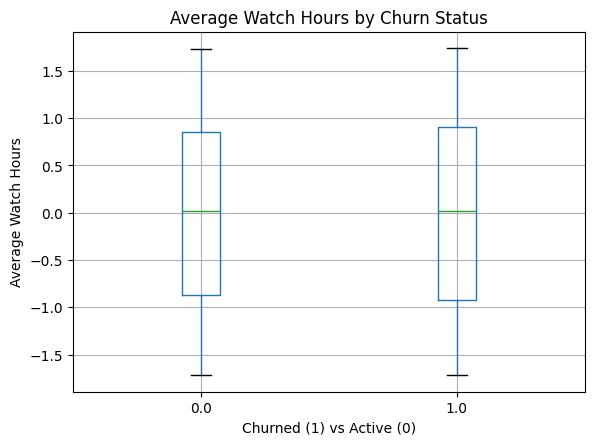

<Figure size 600x400 with 0 Axes>

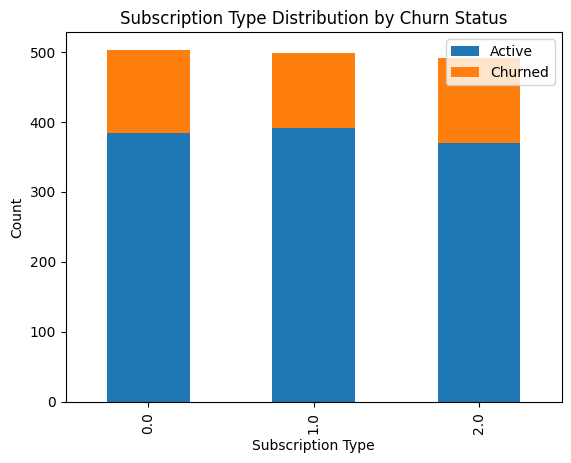

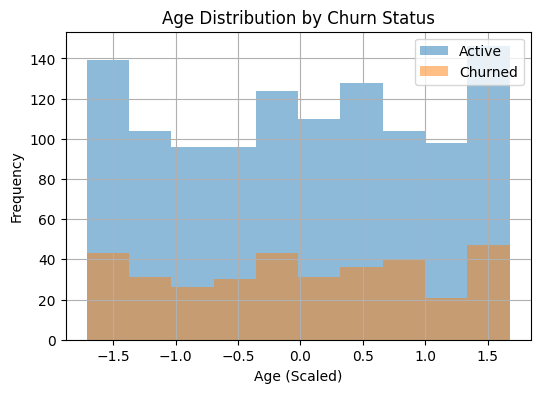

In [97]:
# Boxplot: Average watch hours vs churn
plt.figure(figsize=(6, 4))
df.boxplot(column='average_watch_hours', by='is_churned')
plt.title('Average Watch Hours by Churn Status')
plt.suptitle('')
plt.xlabel('Churned (1) vs Active (0)')
plt.ylabel('Average Watch Hours')
plt.show()
print(" ")

# Bar plot: Subscription type distribution by churn
plt.figure(figsize=(6, 4))
df.groupby(['subscription_type', 'is_churned']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Subscription Type Distribution by Churn Status')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.legend(['Active', 'Churned'])
plt.show()
print(" ")

# Histogram: Age distribution by churn
plt.figure(figsize=(6, 4))
df[df['is_churned'] == 0]['age'].hist(alpha=0.5, label='Active')
df[df['is_churned'] == 1]['age'].hist(alpha=0.5, label='Churned')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age (Scaled)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 5. Predictive Modelling

* Logistic Regression - Binary Classification

*Predict what type of users are more or less likely to churn next*


Confusion Matrix:
          Pred 0  Pred 1
Actual 0     229       0
Actual 1      40      30

Metrics:
Precision: 1.000
Recall: 0.429
F1 Score: 0.600
AUC: 0.844


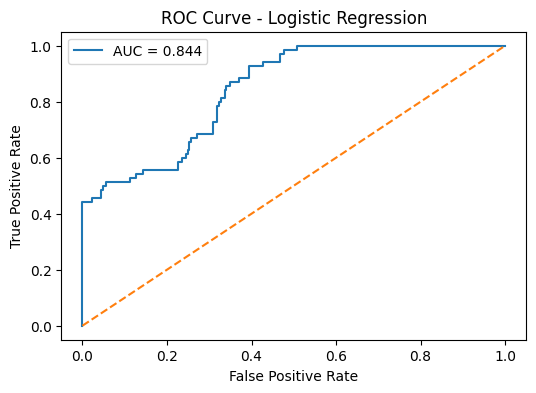


Model Coefficients (sorted by importance):
                       feature  coefficient  abs_coefficient
16        referred_and_churned     3.309297         3.309297
7           referred_by_friend    -2.138458         2.138458
12           heavy_mobile_user    -0.367378         0.367378
3          average_watch_hours     0.364340         0.364340
11         watch_per_fee_ratio    -0.291831         0.291831
8                  monthly_fee    -0.230393         0.230393
4         mobile_app_usage_pct     0.205753         0.205753
15      high_fee_and_low_watch     0.161831         0.161831
14      loyal_and_heavy_mobile     0.157066         0.157066
1                       gender    -0.136895         0.136895
6          received_promotions    -0.124169         0.124169
18  heavy_mobile_and_low_watch    -0.101246         0.101246
17          loyal_and_high_fee    -0.059948         0.059948
2            subscription_type     0.059462         0.059462
5            complaints_raised    -0.0406

In [98]:
# Logistic Regression (Binary Classification)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prepare the features and the target first
numeric_df = df.select_dtypes(include=[int, float]).copy()
X = numeric_df.drop(columns=['is_churned', 'user_id'], errors='ignore')
y = df['is_churned'].astype(int)

# Splitting into sets for testing and sets for splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling and logistic regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

# Evaluation
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_proba)

print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Pred 0', 'Pred 1']))

print("\nMetrics:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC: {auc:.3f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# Coefficients
logreg = pipe.named_steps['logreg']
coef = logreg.coef_[0]
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': coef,
    'abs_coefficient': np.abs(coef)
}).sort_values('abs_coefficient', ascending=False)

print("\nModel Coefficients (sorted by importance):")
print(coef_df)

* Linear Regression - Continuous Prediction

*Predict tenure days (proxy for loyalty)*

R²:  0.4279
RMSE: 0.7630 days


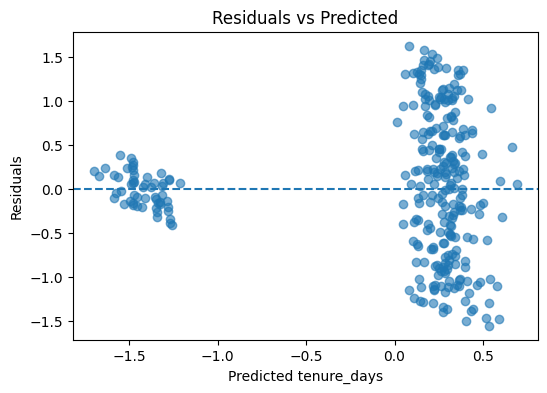

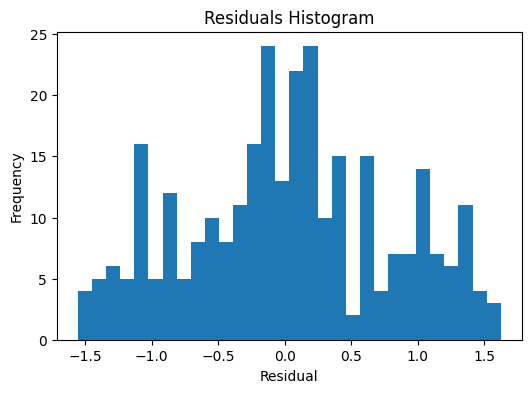

 

Linear Regression Coefficients (sorted by value):


,Feature,Coefficient
10,is_loyal,1.709642
12,heavy_mobile_user,0.207080
15,high_fee_and_low_watch,0.129594
7,referred_by_friend,0.089817
17,loyal_and_high_fee,0.080481
6,received_promotions,0.032831
3,average_watch_hours,0.021205
0,age,0.004942
2,subscription_type,-0.001017
16,referred_and_churned,-0.019894



Top drivers by absolute magnitude:


,Feature,Coefficient,|Coefficient|
10,is_loyal,1.709642,1.709642
12,heavy_mobile_user,0.207080,0.207080
19,high_fee_and_heavy_mobile,-0.175092,0.175092
18,heavy_mobile_and_low_watch,-0.140988,0.140988
15,high_fee_and_low_watch,0.129594,0.129594
11,watch_per_fee_ratio,-0.101266,0.101266
7,referred_by_friend,0.089817,0.089817
17,loyal_and_high_fee,0.080481,0.080481
14,loyal_and_heavy_mobile,-0.069991,0.069991
5,complaints_raised,-0.062785,0.062785


In [99]:
# Linear Regression (Continuous Prediction)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Keep the numeric-only features, drop target and id if present
X = df.select_dtypes(include=[np.number]).drop(columns=[c for c in ["tenure_days", "user_id"] if c in df.columns])
y = df["tenure_days"]

# Splitting into sets for testing and sets for splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fiting model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prediction and evaluation
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = float(np.sqrt(mean_squared_error(y_test, y_pred)))

print(f"R²:  {r2:.4f}")
print(f"RMSE: {rmse:.4f} days")

# Residuals
residuals = y_test - y_pred

# For the plotting part

# Residuals vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, linestyle='--')
plt.xlabel("Predicted tenure_days")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()
print(" ")

# Residuals histogram
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residuals Histogram")
plt.show()
print(" ")

# For the coefficients

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nLinear Regression Coefficients (sorted by value):")
display(coef_df)

# Absolute values strongest effects
coef_abs = coef_df.copy()
coef_abs["|Coefficient|"] = coef_abs["Coefficient"].abs()
coef_abs = coef_abs.sort_values(by="|Coefficient|", ascending=False)
print("\nTop drivers by absolute magnitude:")
display(coef_abs.head(20))